# Finding the Main Factors Affecting Teen Birth Rate
This project looks at various socio-economic and political data to find factors that strongly correlate with increases in teen birth rate. I aggregated, cleaned, and analyzed data factors related to:
- religion
- education
- politics 
- state GDP
- population density
- public school funding
- poverty rate and median income
- abortion rates for teens and overall
- sexual education approaches
- race

### Key Questions Explored:
- Which of the studied variables significantly correlate with teen birth rate?
- Which factor(s) most strongly affect teen birth rate?

### Techniques used:
- pandas for data cleaning
- matplotlib for data visualization
- scikitlearn for linear regression (with regularization)
- statsmodel for summary statistics
- plotly for interactive maps (see end)

### Key Findings:
- Religiosity, poverty rate, and population density in each state appears to have the strongest effect on teen birth rate. Secondary factors may include education level of the population and median income.

### Data Sources:
- Teen birth rates: https://www.hhs.gov/ash/oah/adolescent-development/reproductive-health-and-teen-pregnancy/teen-pregnancy-and-childbearing/trends/index.html
- Religiosity by state: http://www.pewforum.org/religious-landscape-study/state/california/#importance-of-religion-by-state
- GDP by state: https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP#cite_note-2
- Election results: https://en.wikipedia.org/wiki/United_States_presidential_election
- Population, Land area: http://www.ipl.org/div/stateknow/popchart.html
- Public education spending: http://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html
- Poverty rate: https://en.wikipedia.org/wiki/List_of_U.S._states_by_poverty_rate
- Median income by state: https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
- Abortion rate by state: http://www.kff.org/womens-health-policy/state-indicator/abortion-rate/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Abortion percentage by age: http://www.kff.org/womens-health-policy/state-indicator/distribution-of-abortions-by-age/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Sex Education by state: https://www.guttmacher.org/state-policy/explore/sex-and-hiv-education
- Overall Sex Education Score from Graphiq: https://graphiq-stories.graphiq.com/stories/23028/states-worst-sex-education
- Population breakdown by race: http://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

# Reading and understanding dataset
The data from the sources listed above were compiled into a single .csv file. The major factors to be studied are listed after the next cell. A brief rundown of non-descriptive columns:
- Rel-Importance = survey results for importance of religion
- Edu-Level = percent of state residents with certain education level
- 2010 to 2014 change / 2014 spend per student = state funding for public education
- sex ed mandated through family communcation = the laws and guidelines states follow for their sex ed programs (binary)
- Sex Ed score = an aggregated sexual education metric from Graphiq (see above in sources)
- White/Black/Hispanic/Asian = breakdown of state population by race

In [113]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('teen pregnancy rate v3.csv')

data=data[0:51]
data.iloc[0]

State                                       Alabama
Code                                             AL
Teen birth rate (15-19 year olds)                32
Rel-Very Important                              77%
Rel-Somewhat Important                          13%
Rel-Not too important                            6%
Rel-Not at all important                         4%
Rel-Sample Size                                 511
Edu-High School                              84.30%
Edu-Bachelors                                23.50%
Edu-Advanced                                  8.70%
Clinton vote %                               34.36%
Trump vote %                                 62.08%
Gary Johnson vote %                           2.09%
Jill Stein vote %                             0.44%
Obama vote %-12                              38.36%
Romney vote %-12                             60.55%
Gary Johnson vote %-12                        0.59%
Jill Stein vote %-12                          0.16%
Obama vote %

# Data Cleaning
'X' values mean the state does follow the respective guideline, while 'NaN' cells mean states do not follow the guideline. Cells with 'na' show data was not available. 'stress' and 'cover' indicate how much schools emphasize a respective topic.  

In [114]:
data.loc[:5,'abortion per 1000 women (aged 15-44)':'Family Communication']

,abortion per 1000 women (aged 15-44),fraction of abortions under age 19,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,9,0.13,NaN,X,NaN,X,NaN,NaN,X,stress,X,negative,X,NaN
1,10,0.14,na,na,na,na,na,na,na,na,na,na,na,na
2,10,0.11,NaN,NaN,NaN,X,NaN,NaN,NaN,stress,NaN,NaN,X,NaN
3,10,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stress,X,NaN,NaN,NaN
4,10,0.12,X,X,X,X,X,X,X,cover,NaN,inclusive,NaN,X
5,10,0.12,NaN,NaN,X,X,X,NaN,X,cover,NaN,inclusive,NaN,X


### Replacing all 'NaN' with 'No' to indicate states do not follow those guideslines

In [115]:
data.fillna('No', inplace=True)
data.loc[:10,'abortion per 1000 women (aged 15-44)':'Family Communication']

,abortion per 1000 women (aged 15-44),fraction of abortions under age 19,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,9,0.13,No,X,No,X,No,No,X,stress,X,negative,X,No
1,10,0.14,na,na,na,na,na,na,na,na,na,na,na,na
2,10,0.11,No,No,No,X,No,No,No,stress,No,No,X,No
3,10,0.12,No,No,No,No,No,No,No,stress,X,No,No,No
4,10,0.12,X,X,X,X,X,X,X,cover,No,inclusive,No,X
5,10,0.12,No,No,X,X,X,No,X,cover,No,inclusive,No,X
6,15,0.12,No,X,No,No,No,No,na,na,na,na,na,na
7,17,0.14,X,X,No,No,No,No,X,stress,No,inclusive,No,No
8,15,0.15,X,X,No,X,No,No,X,No,No,No,No,No
9,20,0.12,No,No,No,X,No,No,No,stress,X,No,X,No


### Using a dictionary to map values
Converting yes/no values to binary, with a few special cases to differentiate levels

In [116]:
yes_no = {
    'X': 1,
    'No': 0,
    'stress': 2,
    'cover': 1,
    'negative': -1,
    'inclusive': 1
}

for col in data.loc[:5,'sex ed mandated':'Family Communication'].columns:
    data[col] = data[col].map(yes_no)
    
data.loc[:10,'abortion per 1000 women (aged 15-44)':'Family Communication']

,abortion per 1000 women (aged 15-44),fraction of abortions under age 19,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,9,0.13,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,-1.0,1.0,0.0
1,10,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,0.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
3,10,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
4,10,0.12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
5,10,0.12,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
6,15,0.12,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,17,0.14,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
8,15,0.15,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,20,0.12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0


### Replacing any remaining NaN (values that were originally not available) with the average from the column

In [117]:
data = data.fillna(data.mean()).round(2)
data.loc[:10,'abortion per 1000 women (aged 15-44)':'Family Communication']

,abortion per 1000 women (aged 15-44),fraction of abortions under age 19,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,9,0.13,0.00,1.00,0.00,1.00,0.00,0.00,1.00,2.00,1.00,-1.00,1.00,0.00
1,10,0.14,0.54,0.76,0.28,0.59,0.17,0.04,0.45,1.48,0.45,0.19,0.33,0.24
2,10,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00
3,10,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00
4,10,0.12,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00
5,10,0.12,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00
6,15,0.12,0.00,1.00,0.00,0.00,0.00,0.00,0.45,1.48,0.45,0.19,0.33,0.24
7,17,0.14,1.00,1.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,1.00,0.00,0.00
8,15,0.15,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9,20,0.12,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,1.00,0.00


### Removing special characters and converting to float
All strings containing special symbols like dollar signs, percents, etc. will be removed and values converted to float.

In [118]:
import re

def percent_convert(col):
    for row in data[col]:
        num_str = re.sub('[$%,]', '', str(row))
        num = float(num_str)
        data[col] = data[col].replace(row, num)

In [119]:
data_num = data.iloc[:,2:]
data_col = data_num.columns
for val in data_col:
    percent_convert(val)

### Example of cleaned dataset

In [120]:
data.head()

,State,Code,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,...,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication,Sex Ed Score,White,Black,Hispanic,Asian
0,Alabama,AL,32.0,77.0,13.0,6.0,4.0,511.0,84.3,23.5,...,2.00,1.00,-1.00,1.00,0.00,18.35,0.65,0.27,0.04,0.04
1,Alaska,AK,27.8,41.0,29.0,13.0,16.0,310.0,92.1,28.0,...,1.48,0.45,0.19,0.33,0.24,3.53,0.58,0.03,0.06,0.07
2,Arizona,AZ,29.9,51.0,24.0,13.0,11.0,653.0,86.0,27.5,...,2.00,0.00,0.00,1.00,0.00,0.18,0.51,0.04,0.37,0.03
3,Arkansas,AR,39.5,70.0,16.0,7.0,5.0,311.0,84.8,21.1,...,2.00,1.00,0.00,0.00,0.00,42.21,0.74,0.15,0.07,0.02
4,California,CA,21.1,47.0,26.0,13.0,14.0,3697.0,81.8,31.4,...,1.00,0.00,1.00,0.00,1.00,25.28,0.39,0.06,0.38,0.15


In [121]:
data.describe()

,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,Edu-Advanced,Clinton vote %,...,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication,Sex Ed Score,White,Black,Hispanic,Asian
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,24.496078,52.647059,24.352941,11.235294,11.078431,687.666667,87.782353,29.639216,11.243137,44.660392,...,1.476863,0.451961,0.190392,0.332745,0.238431,49.746275,0.684314,0.110196,0.118235,0.045490
std,7.797588,10.648612,4.385538,3.922184,4.302758,646.733165,3.657087,6.028170,3.838919,12.031227,...,0.639942,0.456175,0.457738,0.432051,0.390361,23.216433,0.164915,0.106461,0.099774,0.056083
min,10.600000,32.000000,13.000000,4.000000,4.000000,301.000000,73.000000,19.200000,7.400000,19.730000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.180000,0.190000,0.010000,0.010000,0.010000
25%,19.200000,45.500000,22.500000,8.500000,8.000000,312.000000,85.550000,26.200000,9.100000,35.900000,...,1.000000,0.000000,0.000000,0.000000,0.000000,34.980000,0.580000,0.030000,0.050000,0.020000
50%,23.200000,51.000000,25.000000,12.000000,11.000000,439.000000,88.400000,28.800000,10.400000,45.130000,...,1.480000,0.450000,0.000000,0.000000,0.000000,49.750000,0.720000,0.070000,0.100000,0.030000
75%,28.500000,59.500000,27.000000,13.000000,14.000000,709.000000,90.550000,32.100000,12.150000,51.580000,...,2.000000,1.000000,0.190000,1.000000,0.240000,67.860000,0.805000,0.145000,0.140000,0.050000
max,39.500000,77.000000,32.000000,23.000000,22.000000,3697.000000,92.800000,54.600000,31.300000,90.480000,...,2.000000,1.000000,1.000000,1.000000,1.000000,95.210000,0.940000,0.460000,0.440000,0.390000


# Plotting all factors vs. teen birth rate to explore correlations

In [122]:
data_col_plot = data_col[1:]
data_col_plot

Index(['Rel-Very Important', 'Rel-Somewhat Important', 'Rel-Not too important',
       'Rel-Not at all important', 'Rel-Sample Size', 'Edu-High School',
       'Edu-Bachelors', 'Edu-Advanced', 'Clinton vote %', 'Trump vote %',
       'Gary Johnson vote %', 'Jill Stein vote %', 'Obama vote %-12',
       'Romney vote %-12', 'Gary Johnson vote %-12', 'Jill Stein vote %-12',
       'Obama vote % 08', 'McCain vote %', 'GDP (millions)', 'Population',
       'Land Area (sq mi)', '2010 to 2014 change', '2014 spent per student',
       'Poverty Rate', 'Median Income', 'abortion per 1000 women (aged 15-44)',
       'fraction of abortions under age 19', 'sex ed mandated',
       'HIV ed mandated', 'must be medically accurate',
       'must be age appropriate', 'must be unbiased',
       'cannot promote religion', 'must discuss contraception',
       'importance of abstinence', 'Importance of Sex Only Within Marriage',
       'Discuss Sexual Orientation', 'Negative Outcomes of Teen Sex',
       'F

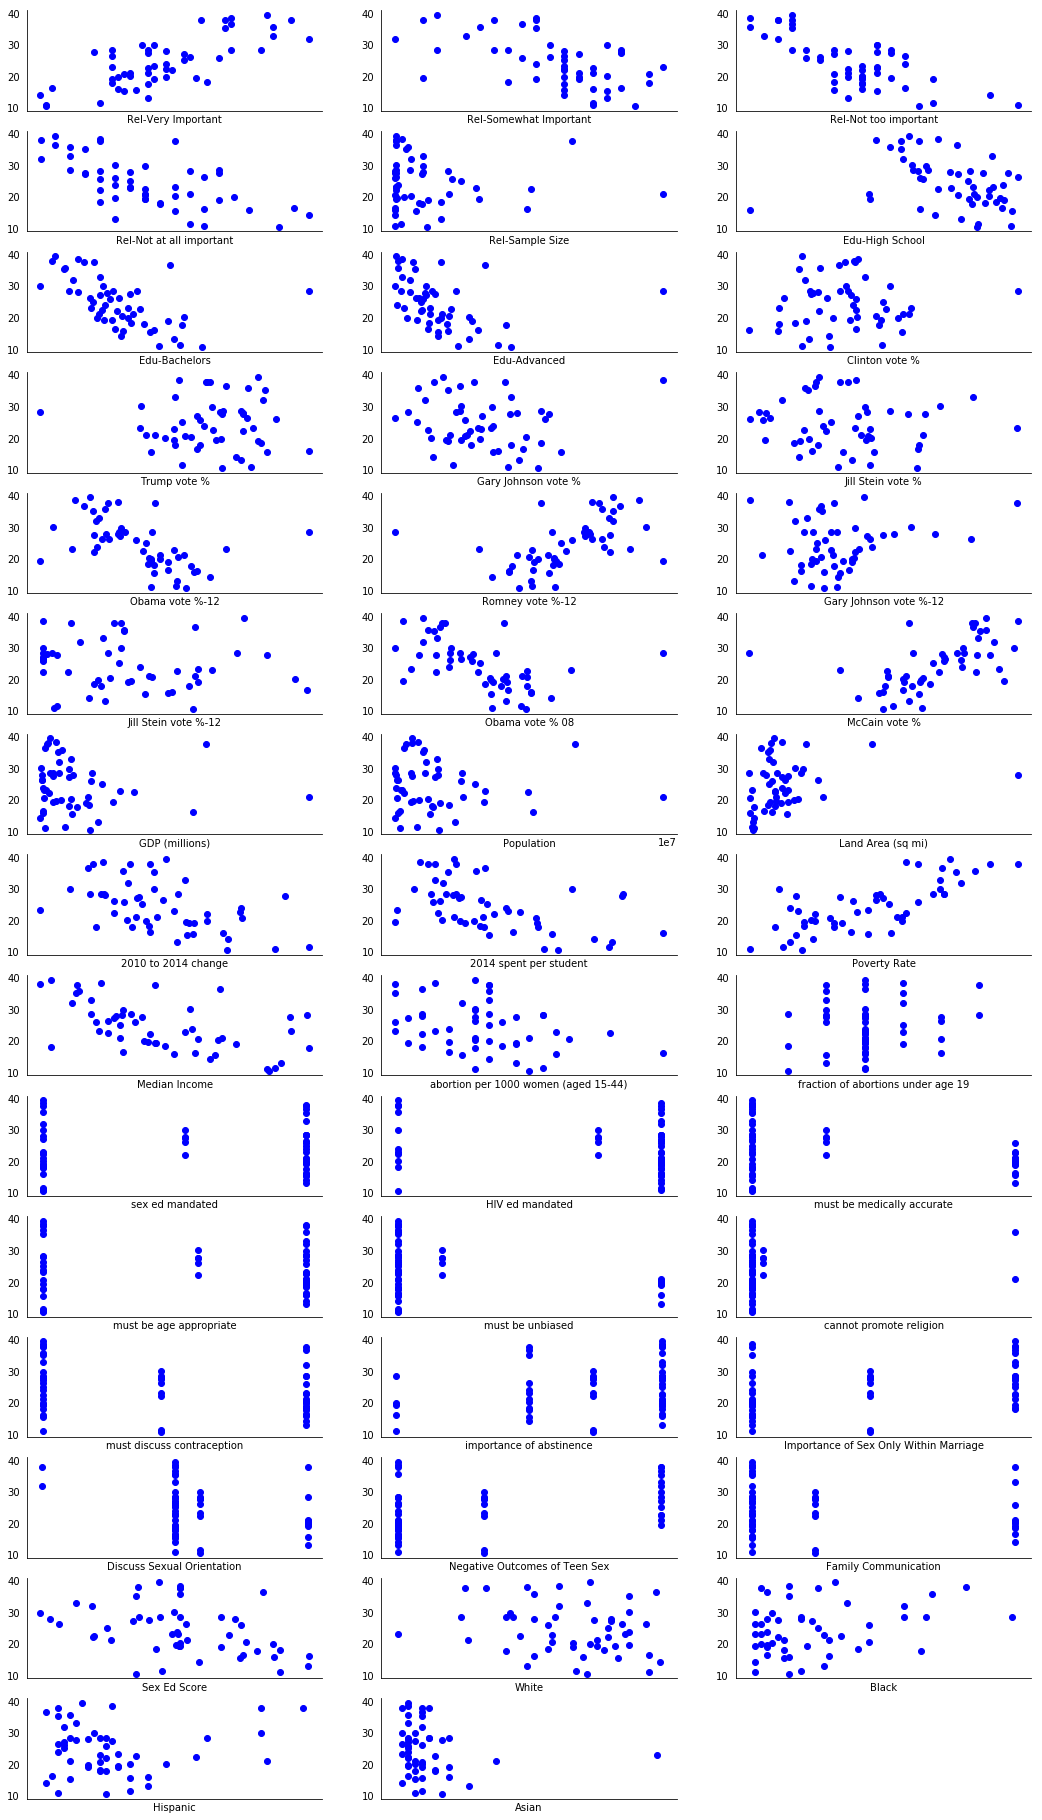

In [126]:
from scipy.stats.stats import pearsonr
%matplotlib inline
fig = plt.figure(figsize=(18, 95))
corr_coeff_p_val = []

for i in range(0,len(data_col_plot)):
    ax = fig.add_subplot(len(data_col_plot)-1/3,3,i+1)
    ax.scatter(data[data_col_plot[i]], data['Teen birth rate (15-19 year olds)'], c='blue')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(data_col_plot[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
plt.show()

# Summary of Correlations
A number of strong correlations do appear, particularly for the continuous variables. For the binary variables from sex education, some trends do appear but are more difficult to visualize. A rough summary of higher correlations:
- religion importance
- education level
- obama/mccain/romney vote levels, though note 2016 election results show little correlation
- money spent per student on education
- poverty rate
- median income
- abortion rate
- sex ed that is medically accurate
- sex ed that must be unbiased
- sex ed that discusses negative outcomes of teen sex


# Creating new factors with data—GDP per capita, Population Density, and Teen abortion rate
A few of our variables can be combined to make more meaningful statistics, such as combining GDP and population to make per capita GDP, combining population and land area for population density, and combining the fraction of teen abortions with the overall abortion rate to get the abortions from teens specifically. 

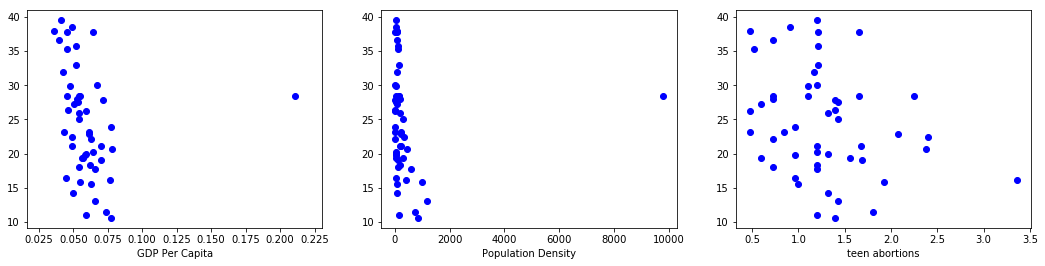

In [127]:
data['GDP Per Capita'] = data['GDP (millions)'] / data['Population']
data['Population Density'] = data['Population'] / data['Land Area (sq mi)']
data['teen abortions per 1000'] = data['abortion per 1000 women (aged 15-44)'] * data['fraction of abortions under age 19']

fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.scatter(data['GDP Per Capita'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(data['Population Density'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_xlabel('Population Density')
ax3.scatter(data['teen abortions per 1000'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax3.set_xlabel('teen abortions')

plt.show()

# Removing Washington DC as an outlier
Washington DC appears to be a large outlier in the previous plots. It will be removed from the analysis to prevent skewing data, as well as because it's unique in that it is not a state directly.

In [128]:
no_DC = data.drop([8])
no_DC = no_DC.reset_index(drop=True)
no_DC.head(10)

,State,Code,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,...,Negative Outcomes of Teen Sex,Family Communication,Sex Ed Score,White,Black,Hispanic,Asian,GDP Per Capita,Population Density,teen abortions per 1000
0,Alabama,AL,32.0,77.0,13.0,6.0,4.0,511.0,84.3,23.5,...,1.00,0.00,18.35,0.65,0.27,0.04,0.04,0.042860,94.193126,1.17
1,Alaska,AK,27.8,41.0,29.0,13.0,16.0,310.0,92.1,28.0,...,0.33,0.24,3.53,0.58,0.03,0.06,0.07,0.071404,1.241768,1.40
2,Arizona,AZ,29.9,51.0,24.0,13.0,11.0,653.0,86.0,27.5,...,1.00,0.00,0.18,0.51,0.04,0.37,0.03,0.047395,56.250637,1.10
3,Arkansas,AR,39.5,70.0,16.0,7.0,5.0,311.0,84.8,21.1,...,0.00,0.00,42.21,0.74,0.15,0.07,0.02,0.041390,56.001930,1.20
4,California,CA,21.1,47.0,26.0,13.0,14.0,3697.0,81.8,31.4,...,0.00,1.00,25.28,0.39,0.06,0.38,0.15,0.069863,238.869669,1.20
5,Colorado,CO,20.3,47.0,28.0,12.0,13.0,504.0,90.7,38.1,...,0.00,1.00,49.75,0.69,0.04,0.21,0.03,0.064363,48.489354,1.20
6,Connecticut,CT,11.5,42.0,27.0,17.0,14.0,377.0,89.9,37.6,...,0.33,0.24,43.34,0.70,0.09,0.15,0.04,0.073691,737.718172,1.80
7,Delaware,DE,20.7,46.0,31.0,10.0,11.0,301.0,88.4,30.0,...,0.00,0.00,73.04,0.63,0.21,0.10,0.04,0.078388,459.639837,2.38
8,Florida,FL,22.5,53.0,25.0,11.0,11.0,2020.0,86.9,27.3,...,1.00,0.00,19.28,0.54,0.16,0.26,0.02,0.049295,348.644886,2.40
9,Georgia,GA,28.4,64.0,20.0,7.0,8.0,968.0,85.4,28.8,...,1.00,0.00,35.07,0.52,0.31,0.10,0.05,0.054230,167.299236,1.65


### GDP per capita and Population Density correlations with Teen Birth rate without Washington DC

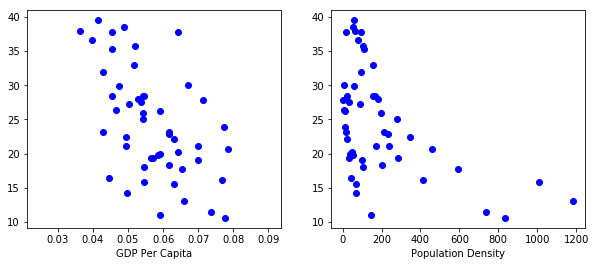

In [129]:
no_DC['GDP Per Capita'] = no_DC['GDP (millions)'] / no_DC['Population']
no_DC['Population Density'] = no_DC['Population'] / no_DC['Land Area (sq mi)']

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2
                     )
ax1.scatter(no_DC['GDP Per Capita'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(no_DC['Population Density'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_xlabel('Population Density')

plt.show()

# Filtering out data columns with correlation p-values > 0.05
Because the data only has 50 samples (50 states), I will need to remove some of the factors to increase the degrees of freedom and prevent over-fitting when performing linear regression. I will remove any variable that does not have a significant correlation with teen birth rate (p-value = 0.05). Any variable without a significant correlation is less likely to be predictive when creating the linear regression model.

In [130]:
data_corr_coeff = no_DC.iloc[:,3:]
data_corr_coeff_columns = data_corr_coeff.columns

corr_coeff_p_val = [.0001, .0001, .0001]

for i in range(len(data_corr_coeff_columns)):
    corr = pearsonr(data_corr_coeff[data_corr_coeff_columns[i]], no_DC['Teen birth rate (15-19 year olds)'])
    corr_coeff_p_val.append(corr[1])

p_value_tab = pd.DataFrame(no_DC.columns, corr_coeff_p_val)
p_value_tab

,0
1.000000e-04,State
1.000000e-04,Code
1.000000e-04,Teen birth rate (15-19 year olds)
1.240715e-10,Rel-Very Important
3.962906e-05,Rel-Somewhat Important
2.173742e-10,Rel-Not too important
2.417666e-07,Rel-Not at all important
6.638894e-01,Rel-Sample Size
2.703974e-02,Edu-High School
1.807235e-08,Edu-Bachelors


# Variables with significant correlation to teen birth rate
The list below shows all the variables that have significant correlations to teen birth rate. All of the variables will initially be input into the linear regression model.

In [131]:
model_factors = [row < 0.05 for row in corr_coeff_p_val]
data_model = no_DC.loc[:,model_factors]
data_model.iloc[0,3:]

Rel-Very Important                               77
Rel-Somewhat Important                           13
Rel-Not too important                             6
Rel-Not at all important                          4
Edu-High School                                84.3
Edu-Bachelors                                  23.5
Edu-Advanced                                    8.7
Obama vote %-12                               38.36
Romney vote %-12                              60.55
Obama vote % 08                               38.74
McCain vote %                                 60.32
2010 to 2014 change                            -6.4
2014 spent per student                         9028
Poverty Rate                                   19.2
Median Income                                 44765
abortion per 1000 women (aged 15-44)              9
must be medically accurate                        0
must be unbiased                                  0
importance of abstinence                          2
Importance o

# Running linear regression on significant factors
The response variable will be the teen birth rate for each state. Each factor will be normalized to between 0 and 1. 

In [132]:
from sklearn.linear_model import LinearRegression

Y = data_model.iloc[:,2]
X = data_model.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
r_squared

0.94860030187965538

# Visualizing regression coefficients

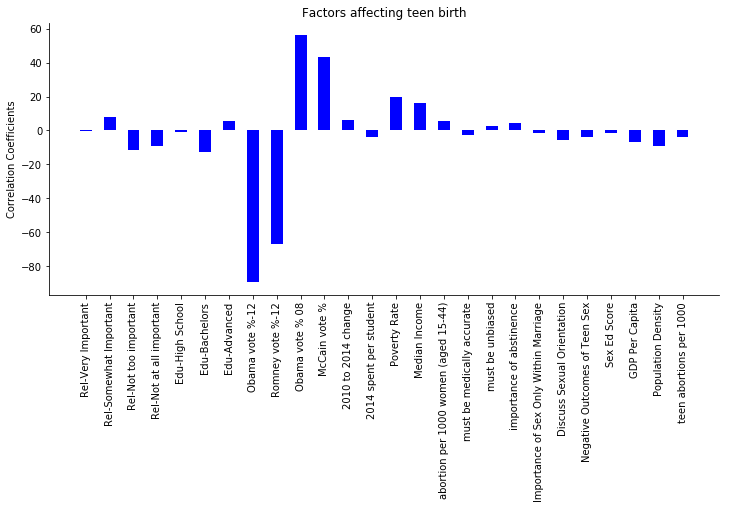

In [133]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Results from initial regression
The plot of regression coefficients above shows that the model is likely being overfit due to the high number of variables. The R^2 value was 0.95, but a few factors are being amplified, showing close 100% change in teen birth rate, as well as non-sensical results. The next model will use regularization to suppress overfitting. 

# Linear regression with regularization 

In [134]:
from sklearn.linear_model import Ridge

Y = data_model.iloc[:,2]
X = data_model.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

clf = Ridge(alpha=1)
mdl = clf.fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
r_squared

0.86238380079456634

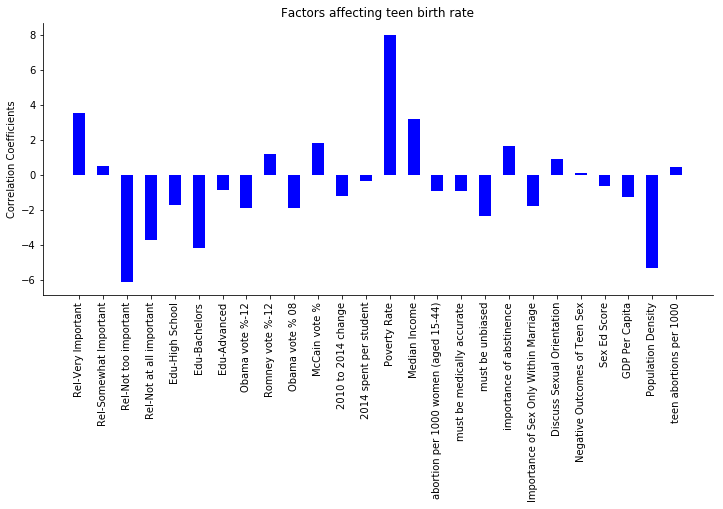

In [135]:
bar_position = range(8)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of regularized model
The regularized model shows much more reasonable results with an R^2 of 0.86. All variables contribute smaller percent changes in the birth rate, with religion, education, poverty rate, and population density looking particularly important. Because all of the religion, educational, and political inputs are related, I will create a single metric for each of these to further reduce the model variables. 

# Reducing model complexity and aggregating related factors
I will create four combined variables for religion importance, political leanings, education level of the state population, and the focus of sexual education teachings, as follows:
- religion ratio = (religion very important + religion somewhat important) / (religion not too important + religion not at all important)
- political ratio = (Obama '12 share + Obama '08 share) / (Romney '12 share + McCain '08 share)
- education score = 1\*percent high school educated + 2\*percent bachelors educated + 3\*percent advanced degree educated
- sex ed focus = (abstinence focus) / (unbiased teachings + medically accurate teaching)

While these metrics are arbitrary, they capture relationships between related variables so that their importance is not spread out among multiple variables. Reducing the number of variables should help improve the fit and show which variables are most important for predicting teen birth rate. 

In [137]:
religion_ratio = (data_model['Rel-Very Important']) + (data_model['Rel-Somewhat Important'])/(data_model['Rel-Not too important'] + data_model['Rel-Not at all important'])
political_ratio = (data_model['Obama vote %-12'] + data_model['Obama vote % 08']) / (data_model['Romney vote %-12'] + data_model['McCain vote %'])
education_score = 1*data_model['Edu-High School'] + 2*data_model['Edu-Bachelors'] + 3*data_model['Edu-Advanced']
sex_ed_focus = (data_model['importance of abstinence']+1) / ((data_model['must be unbiased']+1) + (data_model['must be medically accurate']))

print('religion ratio: ', pearsonr(religion_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print('political ratio: ', pearsonr(political_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print('education score: ', pearsonr(education_score, no_DC['Teen birth rate (15-19 year olds)']))
print('sex ed focus: ', pearsonr(sex_ed_focus, no_DC['Teen birth rate (15-19 year olds)']))

religion ratio:  (0.7667384783619603, 8.489500783097854e-11)
political ratio:  (-0.61239925505011439, 2.2862678584385383e-06)
education score:  (-0.67132897857641682, 9.5028155073303186e-08)
sex ed focus:  (0.5124851867322745, 0.00014188232389361738)


### Summary of new metrics
All of the new metrics show reasonable correlation with our response variable, including signficant p-values.
- As religion importance increases, teen birth rate increases
- As states lean more democratic in voting, teen birth rate decreases
- As education of the population increases, teen birth rate decreases
- As sex ed focuses more on abstinence over medical or unbiased teachings, teen birth rate increases

### Adding new aggregated factors to dataset and removing old factors

In [138]:
data_model_red = data_model.drop(['Rel-Very Important', 'Rel-Somewhat Important',
                                  'Rel-Not too important', 'Rel-Not at all important'],1)
data_model_reduce = data_model_red.drop(['Obama vote %-12', 'Obama vote % 08',
                                  'Romney vote %-12', 'McCain vote %'],1)
data_model_reduced1 = data_model_reduce.drop(['Edu-High School','Edu-Bachelors', 'Edu-Advanced','2010 to 2014 change'],1)
data_model_reduced = data_model_reduced1.drop(['importance of abstinence', 'must be unbiased', 'must be medically accurate'], 1)

data_model_reduced['religion ratio'] = religion_ratio
data_model_reduced['political ratio'] = political_ratio
data_model_reduced['education score'] = education_score
data_model_reduced['sex ed focus'] = sex_ed_focus
data_model_reduced.head()

,State,Code,Teen birth rate (15-19 year olds),2014 spent per student,Poverty Rate,Median Income,abortion per 1000 women (aged 15-44),Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Sex Ed Score,GDP Per Capita,Population Density,teen abortions per 1000,religion ratio,political ratio,education score,sex ed focus
0,Alabama,AL,32.0,9028.0,19.2,44765.0,9,1.00,-1.00,1.00,18.35,0.042860,94.193126,1.17,78.300000,0.637875,157.4,3.000000
1,Alaska,AK,27.8,18416.0,11.4,73355.0,10,0.45,0.19,0.33,3.53,0.071404,1.241768,1.40,42.000000,0.689021,178.4,1.710345
2,Arizona,AZ,29.9,7528.0,18.2,51492.0,10,0.00,0.00,1.00,0.18,0.047395,56.250637,1.10,52.000000,0.836145,171.6,3.000000
3,Arkansas,AR,39.5,9616.0,18.7,41995.0,10,1.00,0.00,0.00,42.21,0.041390,56.001930,1.20,71.333333,0.634923,149.5,3.000000
4,California,CA,21.1,9595.0,16.4,64500.0,10,0.00,1.00,0.00,25.28,0.069863,238.869669,1.20,47.962963,1.636965,179.4,0.666667


# Linear regression on new, reduced model

In [139]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
r_squared

0.88292598378204601

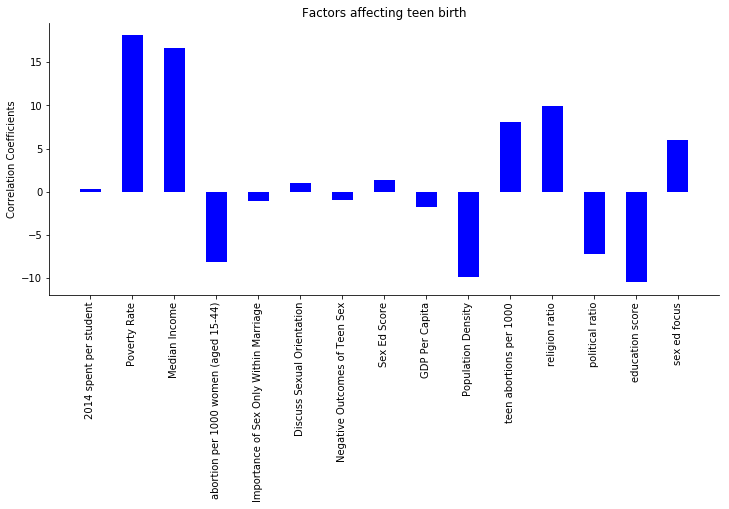

In [140]:
bar_position = range(8)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of regression on reduced model
Regression without regularization shows better results with the aggregated factors. Poverty rate, income, religion ratio, and education score look to be significant. Other factors that may play a role include teen abortion rate, population density, the political ratio, and sex ed focus. While the coefficient changes on the response are more reasonable than the initial fit without regularization the model may be still over-fitting due to the higher number of variables compared to samples.  I will re-fit with regularization again.

# Reduced model fit with regularization

In [142]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

clf = Ridge(alpha=1)
mdl = clf.fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
r_squared

0.81262786048929536

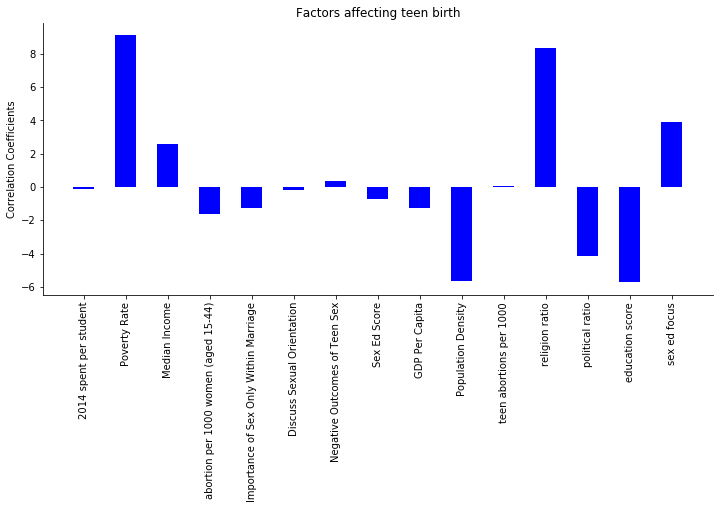

In [143]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Reduced, regularized model results
I believe that the model is beginning to focus in on the most important factors. This model matches relatively well with the previous one in showing that poverty rate and religion ratio are the most dominant factors predicting teen birth. Other important factors appear to be population density, political ratio, education score, and sex ed focus. At this point, I will focus my analysis on these 6 factors. Unfortunately the Ridge model doesn't show summary statistics to prove these are the significant factors, so this selection is done via visual inspection.

# Re-running linear regression with significant factors

In [144]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Poverty Rate','Population Density', 'religion ratio', 
                                  'political ratio','education score', 'sex ed focus']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
r_squared

0.80045298839640378

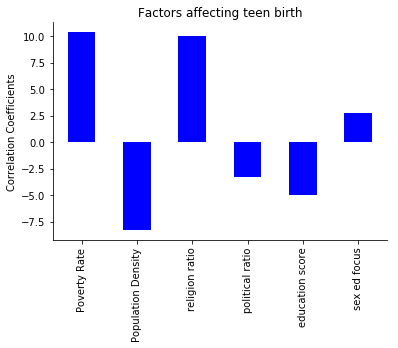

In [145]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of model results
The model with the 6 factors above has an R^2 value of 0.80. The unregularized and regularized models with 16 factors had R^2 values of 0.88 and 0.81 respectively. Thus, I have reduced the explanatory variables by 1/3, while still explaining a high fraction of the data variance. Now that the model is fit reasonably without regularization, the model statistics can be viewed.

In [146]:
import statsmodels.api as sm

X2 = sm.add_constant(X_norm)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Teen birth rate (15-19 year olds)   R-squared:                       0.800
Model:                                           OLS   Adj. R-squared:                  0.773
Method:                                Least Squares   F-statistic:                     28.75
Date:                               Thu, 24 Aug 2017   Prob (F-statistic):           1.55e-13
Time:                                       11:13:22   Log-Likelihood:                -133.22
No. Observations:                                 50   AIC:                             280.4
Df Residuals:                                     43   BIC:                             293.8
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                         coef    std err          t      P>|

# Summary statistics
Poverty rate and religion ratio again have the largest coefficients and are signficant. Population density also appears to be signficant, while political ratio, education score, and sex ed focus are no longer significant. I will move forward with the three significant factors and examine if they are linearly independent prior to creating the final model. 

# Exploring correlations between significant factors (religion, poverty, population density)

(0.70823572790471356, 8.7607908655004781e-09)

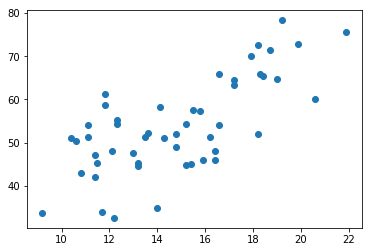

In [42]:
plt.scatter(data_model_reduced['Poverty Rate'], data_model_reduced['religion ratio'])
pearsonr(data_model_reduced['Poverty Rate'], data_model_reduced['religion ratio'])

(-0.2574162171769957, 0.07111896316598329)

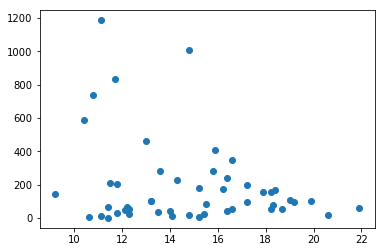

In [43]:
plt.scatter(data_model_reduced['Poverty Rate'], data_model_reduced['Population Density'])
pearsonr(data_model_reduced['Poverty Rate'], data_model_reduced['Population Density'])

(-0.22531651622191798, 0.11566401628055697)

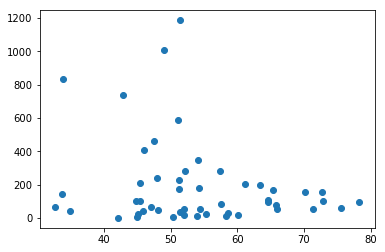

In [44]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['Population Density'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['Population Density'])

# Summary of correlations
Population density is not correlated significantly with either religion ratio or poverty rate. Religion ratio and poverty rate are correlated, so we will explore a final model by removing each factor, one at a time to see the new information provided by each. 

# Model with religion rate, poverty rate, and population density

In [147]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Population Density', 'religion ratio', 'Poverty Rate']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('intercept: ', b)
print('regression coefficients: ', m)
print('r^2: ', r_squared)

intercept:  14.3766042923
regression coefficients:  [-11.33389726  14.46846907  11.66325452]
r^2:  0.768850202649


# Dropping religion rate from analysis

In [148]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Population Density', 'Poverty Rate']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.672072768102


# Dropping poverty rate from the analysis

In [149]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Population Density', 'religion ratio']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.706016185779


# Dropping population density from the analysis

In [150]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Poverty Rate', 'religion ratio']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.676101304971


# Summary of removing final variables
Removing any one of the final 3 variables drops the R^2 fit by at least 0.07, meaning each of these is likely playing a signficant role in predicting teen birth. By including religion ratio, poverty rate, and population density, the model achieves a 0.77 fit.

# Plot of final correlation coefficients to predict teen birth rate. 

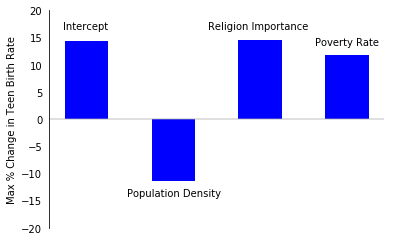

In [151]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plot_m = [14.4, -11.34, 14.5, 11.7]

ax.bar(range(len(plot_m)), plot_m, 0.5,  color='blue',)

ax.set_ylim(-20, 20)
plt.ylabel('Max % Change in Teen Birth Rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

ax.axhline(0, c=(171/255, 171/255, 171/255), alpha=0.5)

ax.text(-.27, 16.6, 'Intercept')
ax.text(0.47, -14.25, 'Population Density')
ax.text(1.4, 16.6, 'Religion Importance')
ax.text(2.63, 13.6, 'Poverty Rate')

fig.savefig("teen birth rate.pdf")
plt.show()

# Model Findings in order of importance
After starting with nearly 50 different explanatory variables, the final model can explain 77% of the variance in teen birth rates with only three variables: the importance of religion in the state, the state's poverty rate, and the population density of the state. In order of importance, the variables affecting teen birth rate include:

- Religion: teen birth rate goes UP as religiosity goes UP in the state and is the most significant predictor of teen birth rate.
- Poverty: teen birth rate goes UP as poverty rate goes UP and is second most significant predictor. 
- Population Density: teen birth rate goes DOWN as population density goes UP. The effect of population density is roughly 1/3 of the relgion effect. 

# Preparing data to create interactive maps

In [152]:
data_model_reduced['religion rank'] = data_model_reduced['religion ratio'].rank(ascending=False).astype(int)
data_model_reduced['density rank'] = data_model_reduced['Population Density'].rank(ascending=False).astype(int)
data_model_reduced['birth rank'] = data_model_reduced['Teen birth rate (15-19 year olds)'].rank(ascending=False).astype(int)
data_model_reduced['poverty rank'] = data_model_reduced['Poverty Rate'].rank(ascending=False).astype(int)
data_model_reduced.iloc[:5,-4:]

,religion rank,density rank,birth rank,poverty rank
0,1,27,10,4
1,46,50,17,43
2,25,33,12,9
3,5,34,1,6
4,35,11,30,16


In [153]:
import plotly.plotly as py
import plotly 

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Teen birth rate (15-19 year olds)'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Teen Birth Rate (%)"
        )
    ) ]

layout = dict(
        title = 'Teen Birth Rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='teen birth map' )

In [154]:
scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) 
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'religion ratio'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Religion Score"
        )
    ) ]

layout = dict(
        title = 'Religiosity by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='religion importance map' )

In [155]:
import plotly.plotly as py
import plotly 

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Poverty Rate'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Poverty Rate (%)"
        )
    ) ]

layout = dict(
        title = 'Poverty Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='poverty rate map' )

In [157]:
import plotly.plotly as py
import plotly 

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Population Density'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Population Density"
        )
    ) ]

layout = dict(
        title = 'Population Density by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='population density map' )